In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline



In [83]:
churn1=pd.read_csv("churn1.csv")

In [84]:
churn2=pd.read_csv("churn2.csv")

In [85]:
churn_df=pd.merge(churn1,churn2,on='customerID')

In [86]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [87]:
for i in churn_df.TotalCharges.unique():
    if i==" ":
        print("null there")

null there


In [88]:
churn_df.drop(churn_df[churn_df.TotalCharges==" "].index,inplace=True,axis=0)


In [89]:
for i in churn_df.TotalCharges.unique():
    if i==" ":
        print("null there")

In [90]:
churn_df.TotalCharges=pd.to_numeric(churn_df.TotalCharges)

In [91]:
churn_df.TotalCharges.dtype

dtype('float64')

In [92]:
for i in churn_df.columns:
    if churn_df[i].dtype=="O":
        churn_df[i]=churn_df[i].astype('category')
    elif churn_df[i].dtype=="int64":
        churn_df[i]=churn_df[i].astype('float64')

In [93]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   category
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   float64 
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   float64 
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 n

In [94]:
churn_df.SeniorCitizen=churn_df.SeniorCitizen.astype('category')

In [95]:
churn_df.drop(['customerID'],axis=1,inplace=True)

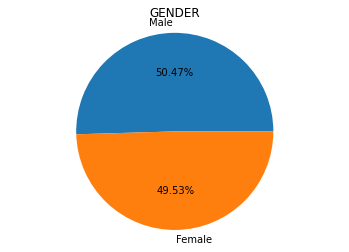

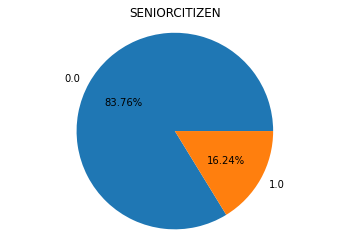

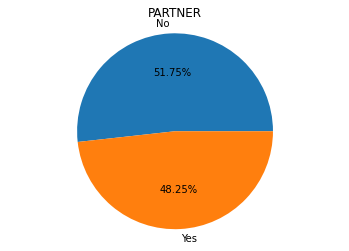

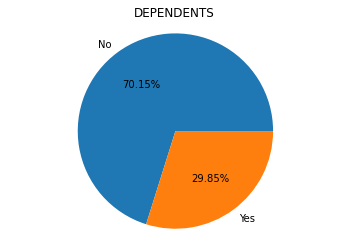

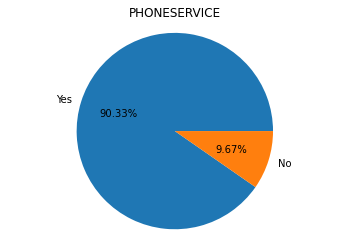

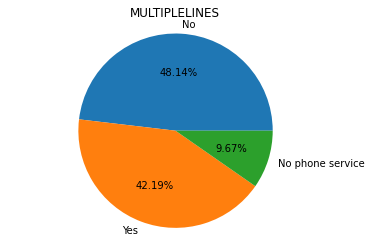

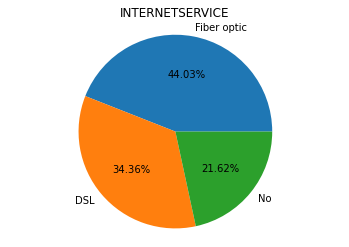

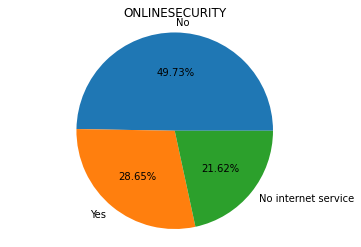

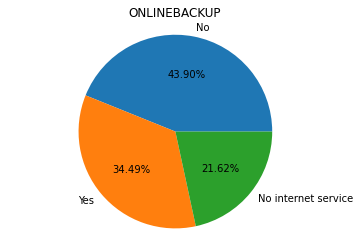

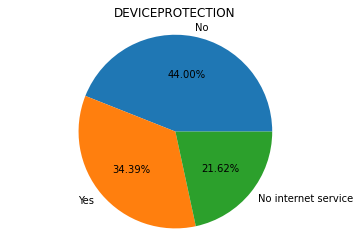

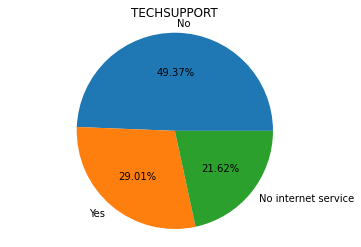

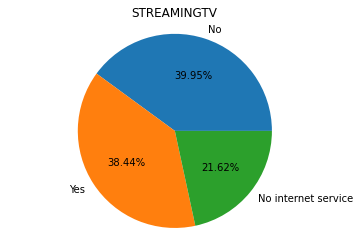

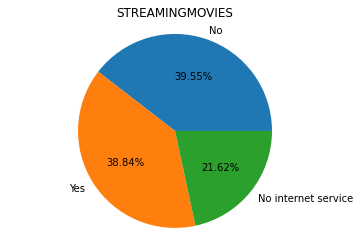

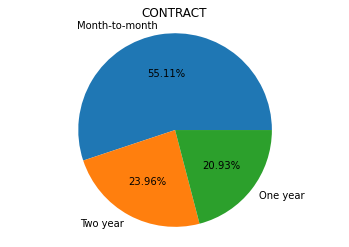

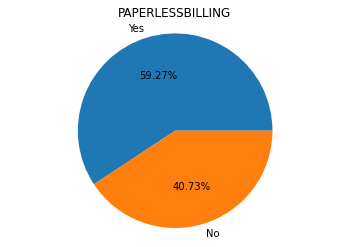

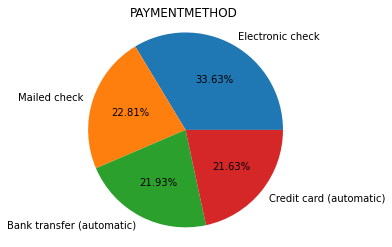

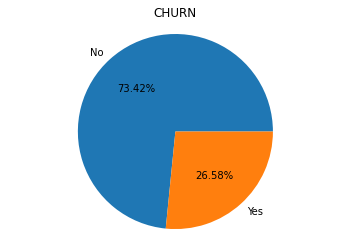

In [96]:
def getPieCharts(data):
    for i in data.columns:
        if (data[i].dtype=='category'):
            plt.pie(data[i].value_counts(),labels=data[i].value_counts().index, autopct='%1.2f%%')
            plt.title(i.upper())
            plt.axis('equal')
            plt.show()

getPieCharts(churn_df)

In [97]:
#encode all the appropriate categorical features with best suitable approach

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   category
 2   Partner           7032 non-null   category
 3   Dependents        7032 non-null   category
 4   tenure            7032 non-null   float64 
 5   PhoneService      7032 non-null   category
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   category
 16  PaymentMethod     7032 n

In [98]:

le=LabelEncoder()
#Encoding all binary categorical values
print(len(churn_df['gender'].unique()))

2


In [99]:
for i in churn_df.columns:
    if len(churn_df[i].unique())==2:
        le.fit(churn_df[i])
        churn_df[i]=le.transform(churn_df[i])
        
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34.0,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2.0,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45.0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2.0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [19]:
len(churn_df.columns)

20

In [20]:
def replaceStruct(replace,df):
    for i in df.unique():
        if i=='Yes':
            replace[i]=1
        else:
            replace[i]=0
    return replace

In [21]:
oneHotCols=['InternetService','Contract','PaymentMethod']

In [22]:
replaceMaster={}
for i in churn_df.columns:
    if i not in oneHotCols:

        if churn_df[i].dtype=='category':
            replace={}
            replaceMaster[i]=replaceStruct(replace,churn_df[i])
replaceMaster
        

{'MultipleLines': {'No phone service': 0, 'No': 0, 'Yes': 1},
 'OnlineSecurity': {'No': 0, 'Yes': 1, 'No internet service': 0},
 'OnlineBackup': {'Yes': 1, 'No': 0, 'No internet service': 0},
 'DeviceProtection': {'No': 0, 'Yes': 1, 'No internet service': 0},
 'TechSupport': {'No': 0, 'Yes': 1, 'No internet service': 0},
 'StreamingTV': {'No': 0, 'Yes': 1, 'No internet service': 0},
 'StreamingMovies': {'No': 0, 'Yes': 1, 'No internet service': 0}}

In [23]:
churn_df=churn_df.replace(replaceMaster)


In [24]:
churn_df=pd.get_dummies(churn_df,columns=oneHotCols)

In [25]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   gender                                   7032 non-null   int64   
 1   SeniorCitizen                            7032 non-null   int64   
 2   Partner                                  7032 non-null   int64   
 3   Dependents                               7032 non-null   int64   
 4   tenure                                   7032 non-null   float64 
 5   PhoneService                             7032 non-null   int64   
 6   MultipleLines                            7032 non-null   category
 7   OnlineSecurity                           7032 non-null   category
 8   OnlineBackup                             7032 non-null   category
 9   DeviceProtection                         7032 non-null   category
 10  TechSupport                         

In [26]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   gender                                   7032 non-null   int64   
 1   SeniorCitizen                            7032 non-null   int64   
 2   Partner                                  7032 non-null   int64   
 3   Dependents                               7032 non-null   int64   
 4   tenure                                   7032 non-null   float64 
 5   PhoneService                             7032 non-null   int64   
 6   MultipleLines                            7032 non-null   category
 7   OnlineSecurity                           7032 non-null   category
 8   OnlineBackup                             7032 non-null   category
 9   DeviceProtection                         7032 non-null   category
 10  TechSupport                         

In [27]:
for i in churn_df.columns:
    if churn_df[i].dtype!='float64' and churn_df[i].dtype!='unit8':
        churn_df[i]=churn_df[i].astype('uint8')
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   uint8  
 1   SeniorCitizen                            7032 non-null   uint8  
 2   Partner                                  7032 non-null   uint8  
 3   Dependents                               7032 non-null   uint8  
 4   tenure                                   7032 non-null   float64
 5   PhoneService                             7032 non-null   uint8  
 6   MultipleLines                            7032 non-null   uint8  
 7   OnlineSecurity                           7032 non-null   uint8  
 8   OnlineBackup                             7032 non-null   uint8  
 9   DeviceProtection                         7032 non-null   uint8  
 10  TechSupport                              7032 no

In [28]:
#Normalise data and standardise data



Scaler=MinMaxScaler()
churn_df.tenure=Scaler.fit_transform(churn_df[['tenure']])

In [29]:
churn_df.MonthlyCharges=Scaler.fit_transform(churn_df[['MonthlyCharges']])

In [30]:
churn_df.TotalCharges=Scaler.fit_transform(churn_df[['TotalCharges']])

In [31]:
#TrainTestSplit



X=churn_df.drop('Churn',axis=1)
y=churn_df.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:


xgb_model=xgb.XGBClassifier()

xgb_model.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [33]:


y_pred=xgb_model.predict(X_test)

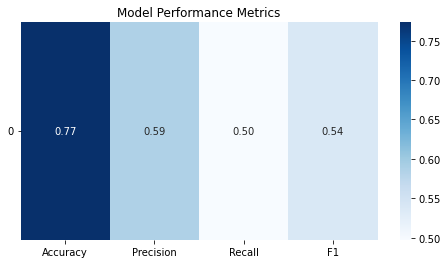

In [34]:
def plot_metrics(y_true, y_pred):
    # Calculate metrics
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Create crosstab
    metrics_df = pd.DataFrame({
        'Accuracy': [acc],
        'Precision': [prec],
        'Recall': [rec],
        'F1': [f1]
    })

    # Plot crosstab
    plt.figure(figsize=(8, 4))
    sns.heatmap(metrics_df, annot=True, cmap='Blues', fmt='.2f')
    plt.title('Model Performance Metrics')
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.show()


plot_metrics(y_test, y_pred)

In [35]:
len(y_pred)

1407

{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50}


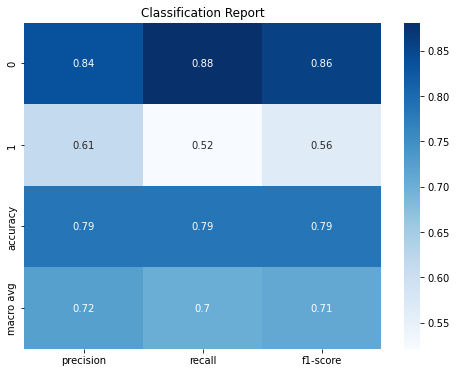

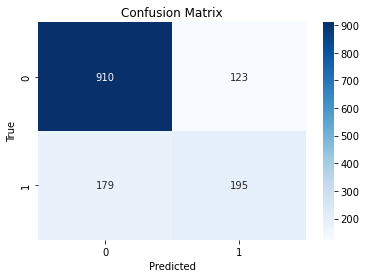

In [36]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
params = {
    'n_estimators':[50,100,150],
    'learning_rate': [0.01, 0.1, 0.5], 
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.2, 0.4, 0.6, 0.8],
    #'subsample': [0.5, 0.7, 0.9]
}

# Create an XGBoost classifier object
xgb_model = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, params, cv=5, scoring='recall', n_jobs=-1)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print(grid_search.best_params_)

# Use the best model to make predictions on the validation set
y_pred = grid_search.predict(X_test)

# Evaluate the performance of the best model on the validation set
report=classification_report(y_test, y_pred, output_dict=True)
# Convert report to a pandas dataframe
df_report = pd.DataFrame(report).transpose()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()


# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues',fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [37]:
best_params={'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50}
best_XGB=xgb.XGBClassifier(**best_params)
best_XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [38]:
y_pred_test=best_XGB.predict(X_test)


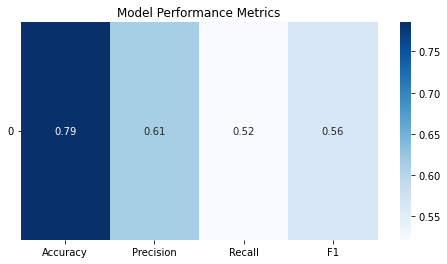

In [39]:
plot_metrics(y_test,y_pred_test)

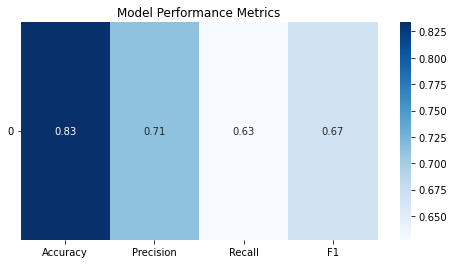

In [40]:
y_pred_train=best_XGB.predict(X_train)
plot_metrics(y_train,y_pred_train)

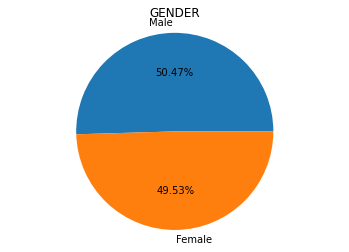

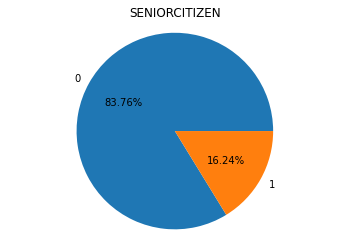

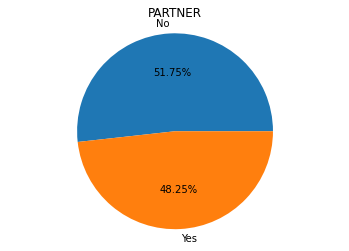

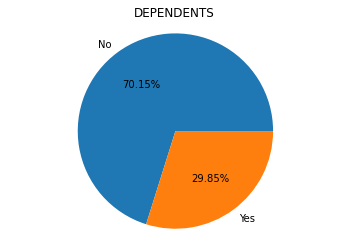

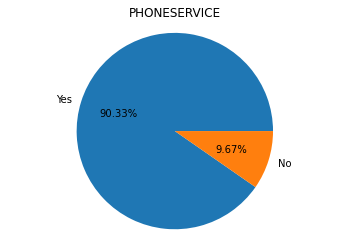

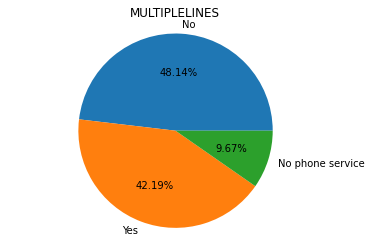

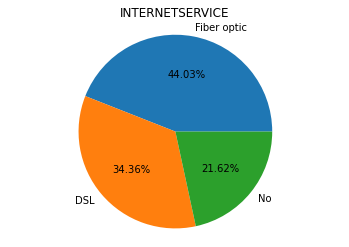

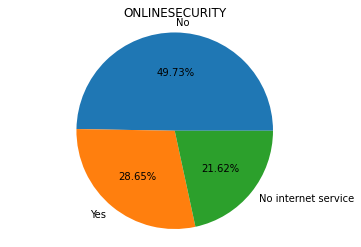

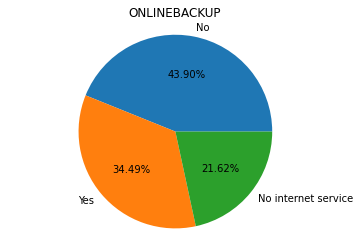

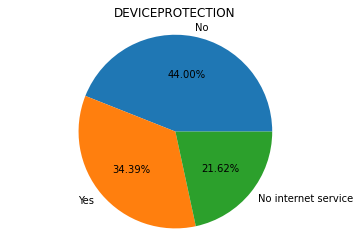

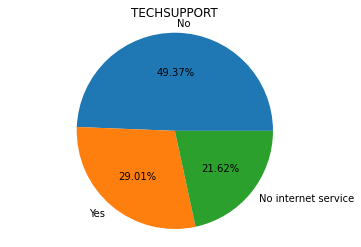

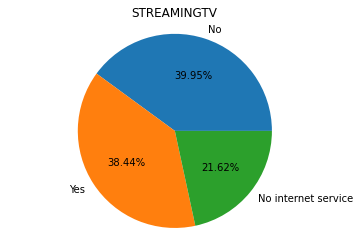

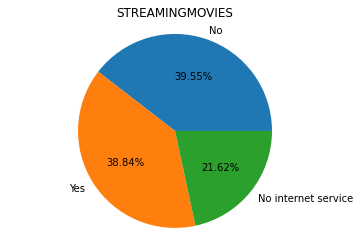

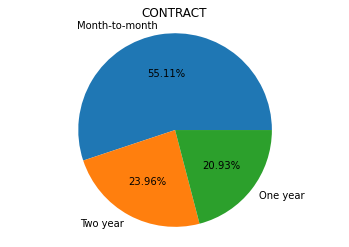

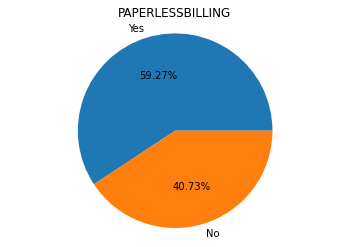

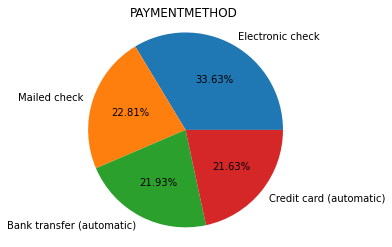

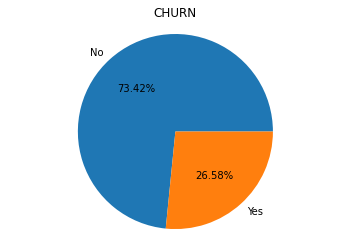

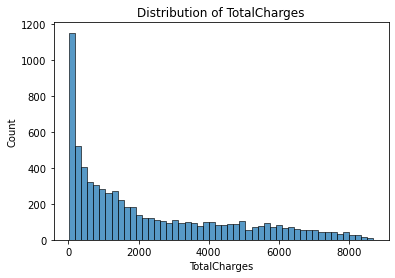

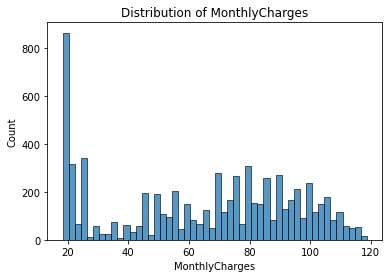

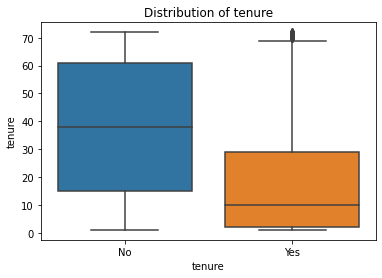

Based on f1 score best model is gbclass with accuracy of 0.5861386138613861


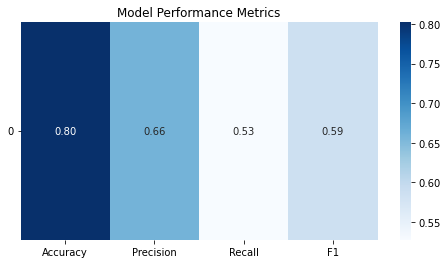

In [ ]:
#question 2
file_name1='churn1.csv'
file_name2='churn2.csv'
churn_df1=pd.read_csv(file_name1)
churn_df2=pd.read_csv(file_name2)
churn_df=pd.merge(churn_df1,churn_df2,on='customerID')

#master function
def run_workflow(data):
    df=data
    
    #pre data analysis clean up
    df=prepare_data_for_analysis(df)
    
    #data analysis
    data_analysis(df)
    
    #data preprocessing
    df=preproccess(df)

    #Splitting data into train and test splits
    X_train,X_test,y_train,y_test=split_data(df,0.3,42,'Churn')
    
    #model building
    models=train(X_train,y_train,['dtree','rfclass','gbclass','xgbclass'])
    
    #model evaluation
    model=best_model(models,X_test,y_test)
    
    #tuning
    model_map={'dtree':DecisionTreeClassifier(random_state=42),'rfclass':RandomForestClassifier(random_state=42),'gbclass':GradientBoostingClassifier(random_state=42),'xgbclass':xgb.XGBClassifier(random_state=42)}
    param_map={
        'dtree':{
            
            'max_depth': [3, 5, 7],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': [None, 'sqrt', 'log2'],
              'criterion': ['gini', 'entropy']
        },
        'rfclass':{
            'n_estimators': [50, 100, 200],
              'max_depth': [3, 5, 7],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2'],
              'bootstrap': [True, False]
        },
        'gbclass':{
            'n_estimators': [50, 100, 200],
              'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 1.0],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2']
            
        },
        'xgbclass':{
            'n_estimators': [50, 100, 200],
              'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 1.0],
              'subsample': [0.5, 0.75, 1.0],
              'colsample_bytree': [0.5, 0.75, 1.0],
              'reg_alpha': [0, 0.1, 1],
              'reg_lambda': [0, 0.1, 1],
              'gamma': [0, 0.1, 1]
        }
    }
    final_model=return_tuned_model(params=param_map[model],score='f1',best_model=model,model_map=model_map,X=X_train,y=y_train)
    plot_metrics(y_test,final_model.predict(X_test))
    #save the best performing model pickle file


run_workflow(churn_df)

In [116]:
#pre data analysis clean up
def prepare_data_for_analysis(churn_df):
    churn_df.drop(churn_df[churn_df.TotalCharges==' '].index,inplace=True)
    churn_df.TotalCharges=churn_df.TotalCharges.astype('float64')
    churn_df.SeniorCitizen=churn_df.SeniorCitizen.astype('category')
    churn_df.drop('customerID',inplace=True,axis=1)
    return churn_df
    

In [117]:
#data analysis
def getPie(data):#pie charts for categorical values
    for i in data.columns:
        if (data[i].dtype=='category' or data[i].dtype=='object'):
            plt.pie(data[i].value_counts(),labels=data[i].value_counts().index, autopct='%1.2f%%')
            plt.title(i.upper())
            plt.axis('equal')
            plt.show()
def getBar(data):#hist plots to know Charges Distribution
    for i in data.columns:
            sns.histplot(data=data,x=i,bins=50)
            plt.xlabel(i)
            plt.ylabel('Count')
            plt.title('Distribution of '+i)
            plt.show()
def getBox(data,hue):#box plots to know the distribution of timely data
    for i in data.drop(hue,axis=1).columns:
        sns.boxplot(data=data,x=hue,y=i)
        plt.xlabel(i)
        plt.title('Distribution of '+i)
        plt.show()   
def data_analysis(data):
    getPie(data)
    getBar(data[['TotalCharges','MonthlyCharges']])
    getBox(pd.DataFrame(data[['tenure','Churn']]),'Churn')
    

In [139]:
#data preprocessing
def change_type(data,prev="int64",to="float64"):
    for i in data.select_dtypes(prev).columns:
        data[i]=data[i].astype(to)


def oneHotEncode(data,cols):
    return pd.get_dummies(data,columns=cols)
def labelEncode(data,cols):
    le=LabelEncoder()
    for i in cols:
        le.fit(data[i])
        data[i]=le.transform(data[i])
def replaceStruct(data,mapping):
    return data.replace(mapping)
def normalise(data,cols): #normalise the columns
    scaler=MinMaxScaler()
    for i in cols:
        data[i]=scaler.fit_transform(data[[i]])
def preproccess(df):
    data=df
    #change types
    change_type(data,prev='object',to='category')
    change_type(data,prev='int64',to='float64')
    #one Hot encoding
    data=oneHotEncode(data,['InternetService','Contract','PaymentMethod'])
    
    
    #labelEncoding
    cols=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn']
    labelEncode(data,cols)
    
    #Replacing values
    replace_map={'MultipleLines': {'No phone service': 0, 'No': 0, 'Yes': 1},
 'OnlineSecurity': {'No': 0, 'Yes': 1, 'No internet service': 0},
 'OnlineBackup': {'Yes': 1, 'No': 0, 'No internet service': 0},
 'DeviceProtection': {'No': 0, 'Yes': 1, 'No internet service': 0},
 'TechSupport': {'No': 0, 'Yes': 1, 'No internet service': 0},
 'StreamingTV': {'No': 0, 'Yes': 1, 'No internet service': 0},
 'StreamingMovies': {'No': 0, 'Yes': 1, 'No internet service': 0}}
    
    data=replaceStruct(data,replace_map)
    change_type(data,prev='category',to='uint8')#memory reduction
    change_type(data,prev='int64',to='uint8') #memory reduction
    #normalizing numeric data
    normalise(data,['tenure', 'MonthlyCharges', 'TotalCharges'])
    return data
    
    


    

In [119]:
#splitting the data
def split_data(data,test,r_state,target):
    return train_test_split(data.drop(target,axis=1),data[target],test_size=test,random_state=r_state)
    
    

In [120]:
#model Building

def train_model(X_train,y_train,model_type):
    if model_type=='dtree':
        model=DecisionTreeClassifier()
    elif model_type=='rfclass':
        model=RandomForestClassifier()
    elif model_type=='gbclass':
        model=GradientBoostingClassifier()
    elif model_type=='xgbclass':
        model=xgb.XGBClassifier()
    model.fit(X_train,y_train)
    return model
def train(X_train,y_train,models):
    model_map={}
    for i in models:
        model_map[i]=train_model(X_train,y_train,i)
    return model_map
        
        
        

In [182]:
#model evaluation
def best_model(model_map,X_test,y_test):
    best_model=""
    best_f1=0
    for i in model_map.keys():
        y_pred=model_map[i].predict(X_test)
        f1=f1_score(y_test,y_pred)
        
        if f1>best_f1:
            best_model=i
            best_f1=f1
    print("Based on f1 score best model is {} with accuracy of {}".format(best_model,best_f1))
    plot_metrics(y_test,model_map[best_model].predict(X_test))
    return best_model
    
    

In [193]:
#Tuning
def return_tuned_model(params,score,best_model,X,y,model_map):
    grid_params=params
    grid_search=GridSearchCV(model_map[best_model],param_grid=grid_params,cv=5,n_jobs=-1,scoring=score)
    grid_search.fit(X,y)
    # Print best parameters and score
    print(f'Best parameters: {grid_search.best_params_}')
    print(f'Best score: {grid_search.best_score_:.4f}')
    final_model=model_map[best_model].set_params(**grid_search.best_params_)
    final_model.fit(X,y)
    return final_model
